# Lista Prática 3 - Analise de Séries Temporais

Humberto Seghetto dos Santos - 1810232

Pedro Thiago Marmello - 1612702

In [ ]:
## Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

import statsmodels.api as sm
import numpy as np
from IPython.display import clear_output

In [ ]:
!pip install pmdarima
import pmdarima as pm

In [ ]:
## Funções
def root_mean_square_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    r = y_true - y_pred
    return np.mean(r**2)**(1/2)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_absolute_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred))

# 1 - Serie temporal

A serie temporal aqui utilizada será a serie de desemprego nos Estados Unidos (EUA), disponivel em https://www.kaggle.com/datasets/axeltorbenson/unemployment-data-19482021, a mesma serie utilizada na lista 1 pelo Pedro.

Como a serie é muito instavel, devido as varias crises e choques economicos, e tambem muito grande, possuindo mais de 70 anos de dados, escolhemos trabalhar especificamente com um periodo de 10 anos entre jan/2010 até dez/2019. Esse periodo foi escolhido por ser de um tamanho satisfatório e ser relativamente estável sem grandes choques economicos externos, situando-se suficientemente distante da crise de 2008 e antes dos efeitos da pandemia de COVID-19.

In [ ]:
## Importando a série
df_original = pd.read_csv("unemployment_rate_data.csv",index_col="date")
df_original.index = pd.to_datetime(df_original.index)
df_original = df_original.sort_index()
df = df_original[-143:-35]
df_teste = df_original[-35:-35+12]
df

,unrate,unrate_men,unrate_women,unrate_16_to_17,unrate_18_to_19,unrate_20_to_24,unrate_25_to_34,unrate_35_to_44,unrate_45_to_54,unrate_55_over
date,,,,,,,,,,
2010-01-01,10.6,12.3,8.5,26.8,26.9,17.1,11.0,9.4,8.5,7.5
2010-02-01,10.4,12.2,8.5,27.4,25.0,16.6,10.8,9.5,8.4,7.6
2010-03-01,10.2,11.8,8.3,29.2,23.6,15.8,10.9,9.1,8.4,7.2
2010-04-01,9.5,10.6,8.2,27.3,22.3,16.4,10.0,7.9,7.7,6.7
2010-05-01,9.3,10.1,8.5,30.2,25.0,15.2,10.3,7.4,7.2,6.6
...,...,...,...,...,...,...,...,...,...,...
2018-08-01,3.9,3.7,4.3,12.4,12.3,6.5,4.3,2.9,2.7,3.2
2018-09-01,3.6,3.5,3.6,11.4,12.9,6.9,3.3,2.8,2.5,2.8
2018-10-01,3.5,3.5,3.6,9.3,13.0,6.6,3.6,2.8,2.5,2.6


## 1.A

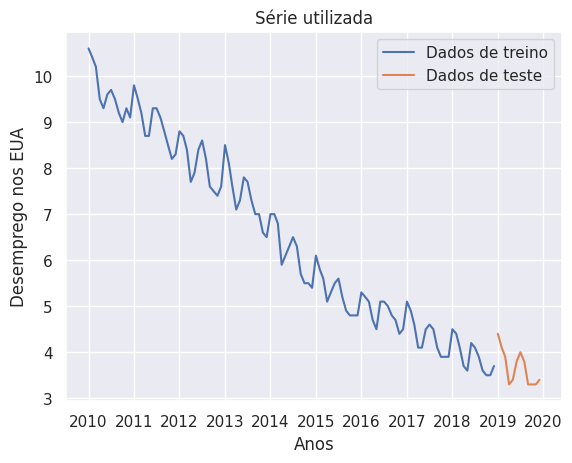

In [ ]:
sns.set_theme()
plt.plot(df.unrate,label = "Dados de treino")
plt.plot(df_teste.unrate,label="Dados de teste")
plt.legend()
plt.title("Série utilizada")
plt.xlabel("Anos")
plt.ylabel("Desemprego nos EUA")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

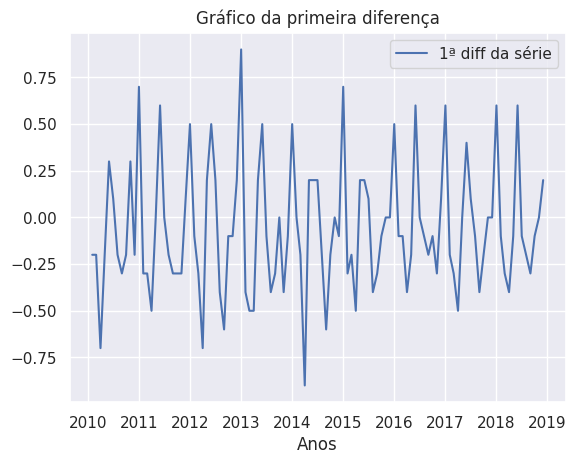

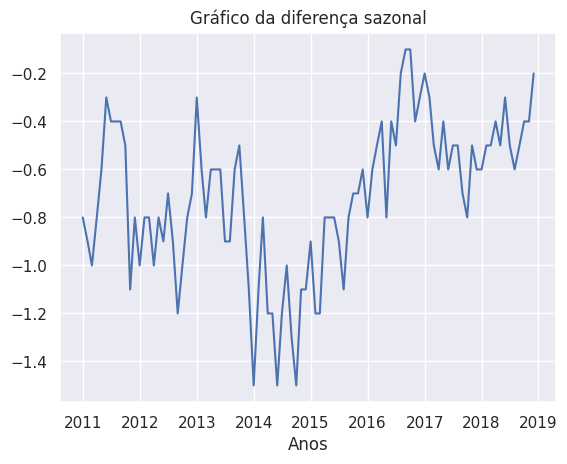

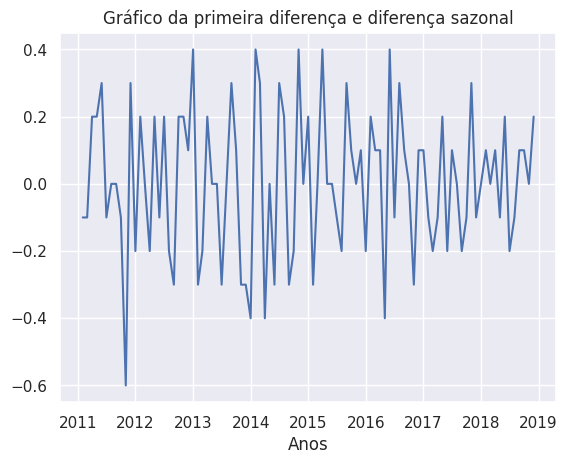

In [ ]:
## Gráficos
diff_1a = df.diff()
diff_1a.dropna(inplace=True)
plt.plot(diff_1a.unrate,label = "1ª diff da série")
plt.legend()
plt.title("Gráfico da primeira diferença")
plt.xlabel("Anos")
plt.ylabel("")
plt.show

plt.figure()
diff_1s = df.diff(12)
diff_1s.dropna(inplace=True)
plt.plot(diff_1s.unrate,label = "diff sazonal")
plt.title("Gráfico da diferença sazonal")
plt.xlabel("Anos")
plt.ylabel("")
plt.show

plt.figure()
diff_1sa = diff_1s.diff()
diff_1sa.dropna(inplace=True)
plt.plot(diff_1sa.unrate,label = "1ª diff + diff sazonal")
plt.title("Gráfico da primeira diferença e diferença sazonal")
plt.xlabel("Anos")
plt.ylabel("")
plt.show

A partir dos gráficos acima podemos determinar que se trata de uma serie de tendencia (aproximadamente) linear com sazonalidade, na qual devemos usar d=1, uma vez que ambos os casos para d=0 não são estacionários com (d = 0, D = 0) apresentando uma tendencia de queda e (d=0, D=1) apresentando uma tendencia de subida em parte relevante do periodo de interesse.



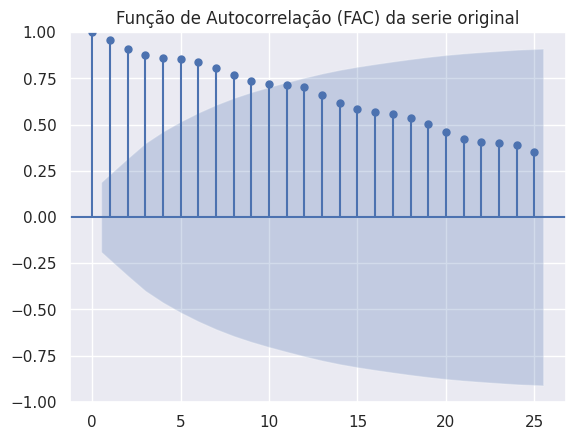

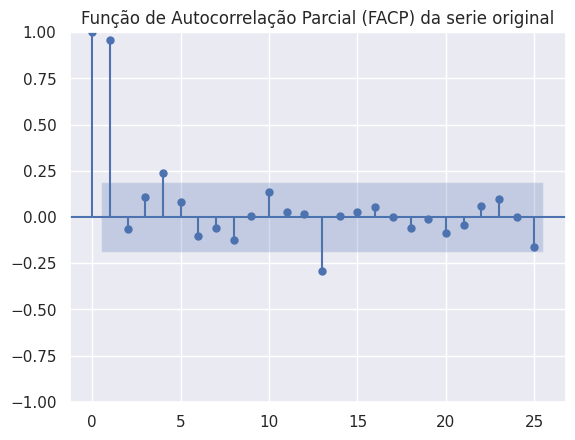

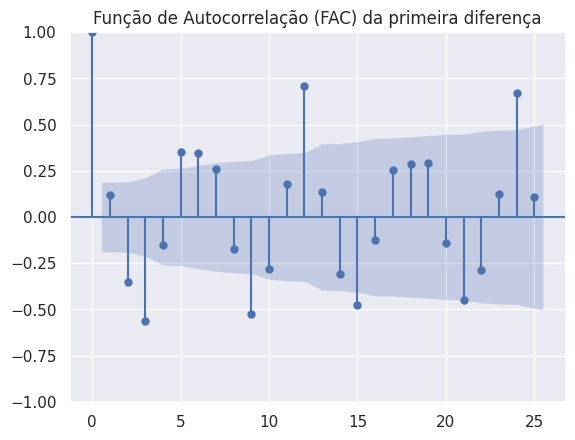

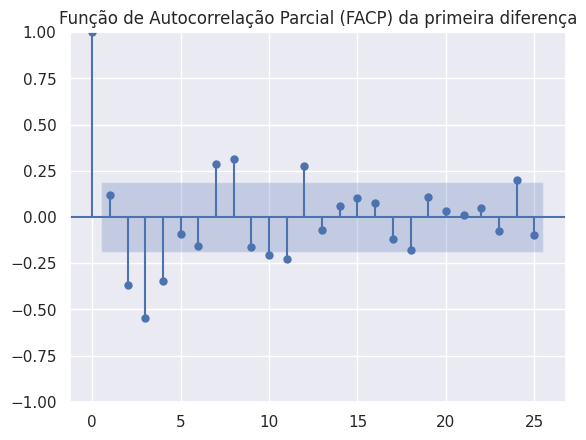

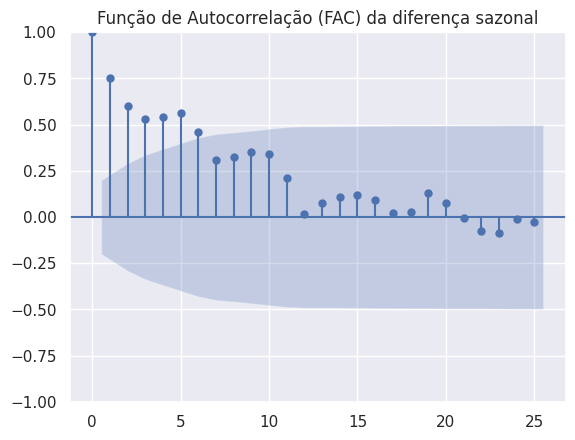

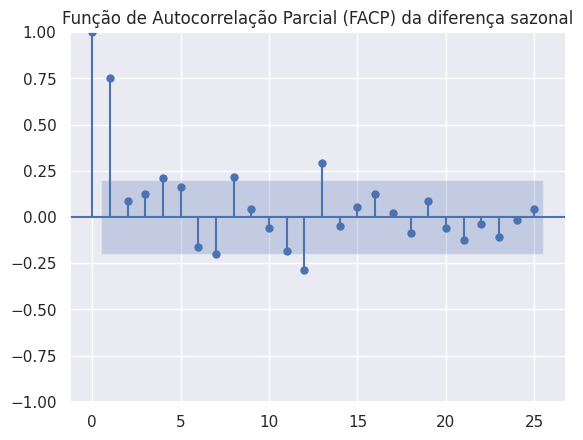

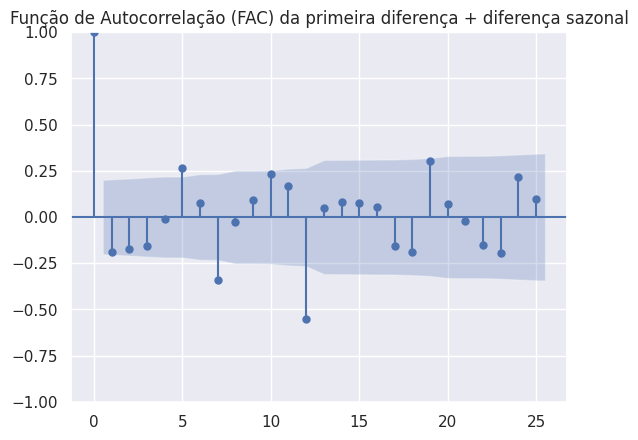

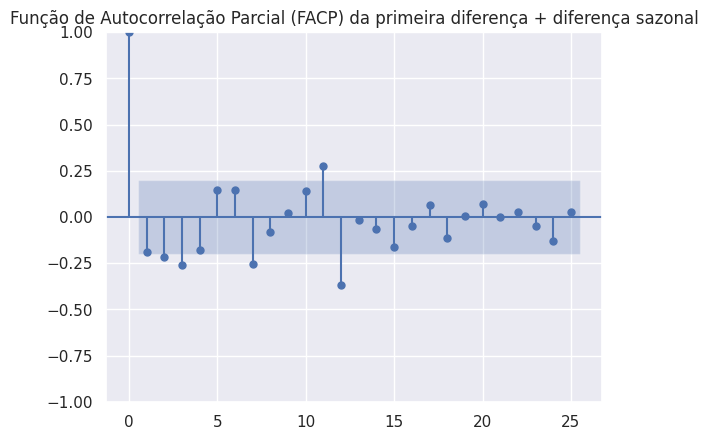

In [ ]:
z = df.unrate
### Gráficos de autocorrelação da serie original
sm.graphics.tsa.plot_acf(z, lags = 25)
plt.title("Função de Autocorrelação (FAC) da serie original")
sm.graphics.tsa.plot_pacf(z, lags = 25)
plt.title("Função de Autocorrelação Parcial (FACP) da serie original")
print("")

z = diff_1a.unrate
### Gráficos de autocorrelação da diff 1ª
sm.graphics.tsa.plot_acf(z, lags = 25)
plt.title("Função de Autocorrelação (FAC) da primeira diferença")
sm.graphics.tsa.plot_pacf(z, lags = 25)
plt.title("Função de Autocorrelação Parcial (FACP) da primeira diferença")
print("")

z = diff_1s.unrate
### Gráficos de autocorrelação da diff sazonal
sm.graphics.tsa.plot_acf(z, lags = 25)
plt.title("Função de Autocorrelação (FAC) da diferença sazonal")
sm.graphics.tsa.plot_pacf(z, lags = 25)
plt.title("Função de Autocorrelação Parcial (FACP) da diferença sazonal")
print("")


z = diff_1sa.unrate
### Gráficos de autocorrelação da diff 1ª + sazonal
sm.graphics.tsa.plot_acf(z, lags = 25)
plt.title("Função de Autocorrelação (FAC) da primeira diferença + diferença sazonal")
sm.graphics.tsa.plot_pacf(z, lags = 25)
plt.title("Função de Autocorrelação Parcial (FACP) da primeira diferença + diferença sazonal")
print("")

Observamos pelos gráficos das FAC/FACP que as mesmas se mostram mais acentuadas para (d=1,D=0) quando comparando ao caso (d=1,D=1). Em especial notamos um pico na autocorrelação para o lag 12 no caso (d=1,D=0), fato explicado pela sazonalidade da série. Como a autocorrelação e autocorrelação parcial do lag 24 decaiu muito pouco em relação a ao lag 12 para o caso (d=1,D=0), escolhemos em um primeiros momento D=1.

## 1.B

Determinamos por inspeção visual dos gráficos apresentados que não é necessário trabalhar utilizando o logaritmo da série, uma vez que a variancia da série se mantem razoavelmente estavel.

## 1.C

Escolhendo d = 1 e D = 1 conforme discutido nos itens anteriores, temos Zt na seguinte forma:

\begin{equation}
Z_t = (1 - L)^1 (1 - L^{12})^1 Y_t
\end{equation}

# 2 - SARIMA

## 2.A

### Modelo SARIMA utilizando auto_arima

In [ ]:
arima = pm.auto_arima(df.unrate, max_order=None, m=12)

In [ ]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  108
Model:             SARIMAX(0, 1, 1)x(2, 0, 1, 12)   Log Likelihood                  34.676
Date:                            Sat, 18 Nov 2023   AIC                            -57.352
Time:                                    18:07:20   BIC                            -41.315
Sample:                                01-01-2010   HQIC                           -50.851
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0001      0.001     -0.254      0.800      -0.001       0.001
ma.L1         -0.2862      0.101     -2.827      0.005      -0.485      -0.088
ar.S.L12       0.8507      0.150      5.674      0.000       0.557       1.145
ar.S.L24       0.1470      0.145      1.016      0.310      -0.136       0.430
ma.S.L12      -0.8373      0.300     -2.787      0.005      -1.426      -0.249
sigma2         0.0213      0.005      3.947      0.000       0.011       0.032
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                 1.09
Prob(Q):                              0.57   Prob(JB):                         0.58
Heteroskedasticity (H):               0.57   Skew:                            -0.25
Prob(H) (two-sided):                  0.10   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Comentário: Observamos que o modelo escolhido pelo auto_arima utiliza (d=1,D=0),

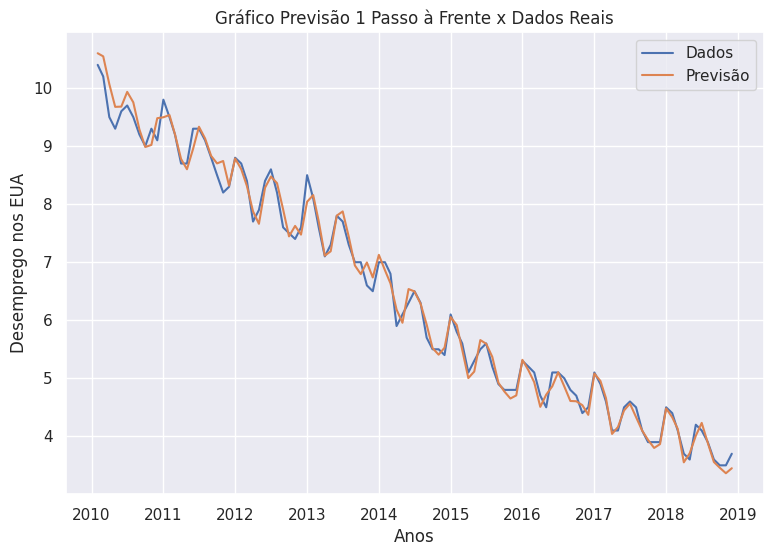

In [ ]:
serie = df.unrate[1:]
prev1 = arima.fittedvalues()[1:]
conf_int = arima.conf_int()

plt.figure(figsize=(9,6))
plt.plot(df.index[1:],serie, label = "Dados")
plt.plot(df.index[1:],prev1, label = "Previsão")

plt.legend()
plt.title("Gráfico Previsão 1 Passo à Frente x Dados Reais")
plt.xlabel("Anos")
plt.ylabel("Desemprego nos EUA")
plt.show()

## 2.B



### Analise dos residuos

,lb_stat,lb_pvalue
1,1.443905,0.229508
2,2.727264,0.255730
3,2.811407,0.421626
4,3.383355,0.495835
5,4.544540,0.473946
6,5.647285,0.463837
7,5.662538,0.579658
8,5.954739,0.652302
9,5.987595,0.741159
10,6.125908,0.804576


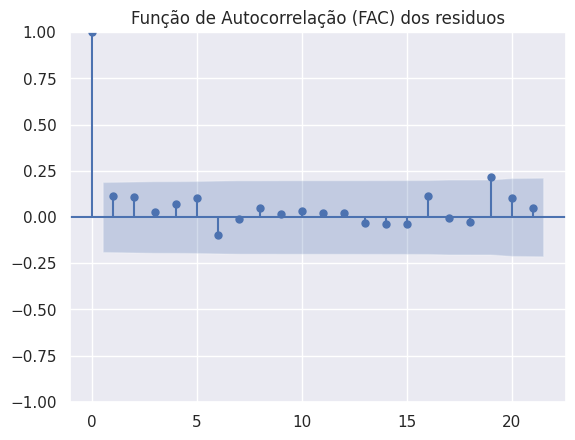

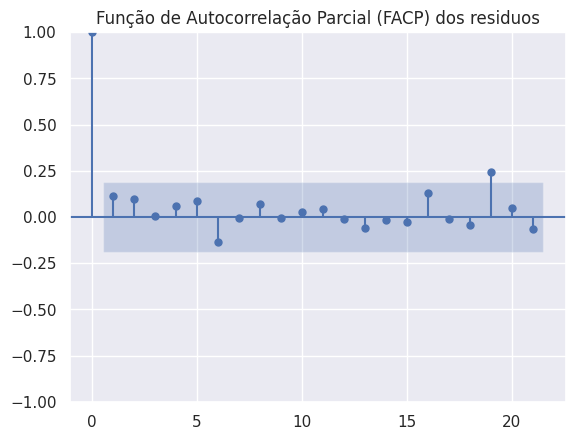

In [ ]:
resids = arima.resid()[1:] # Eliminamos o primeiro residuo pois d=1, logo sem previsão pra t=1

## Autocorrelação deve ser nula
sm.graphics.tsa.plot_acf(resids)
plt.title("Função de Autocorrelação (FAC) dos residuos")
sm.graphics.tsa.plot_pacf(resids)
plt.title("Função de Autocorrelação Parcial (FACP) dos residuos")
print("")

sm.stats.diagnostic.acorr_ljungbox(resids)

(array([ 2.,  3.,  3., 13., 14., 30., 26., 11.,  3.,  1.]),
 array([-0.56903638, -0.46628835, -0.36354033, -0.26079231, -0.15804429,
        -0.05529627,  0.04745175,  0.15019978,  0.2529478 ,  0.35569582,
         0.45844384]),
 <BarContainer object of 10 artists>)

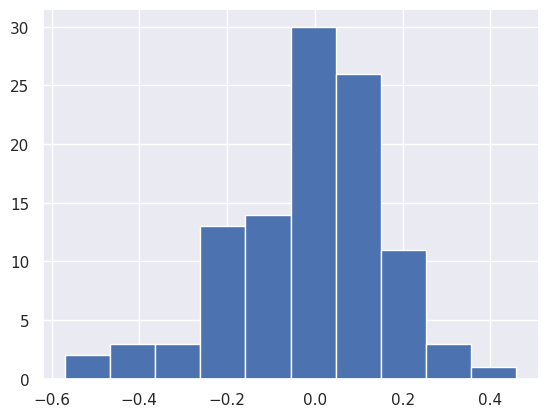

In [ ]:
plt.hist(resids[1:])

(7.640637519119865, 0.021920812311996152, -0.5387707623109137, 3.743432658329943)


[]

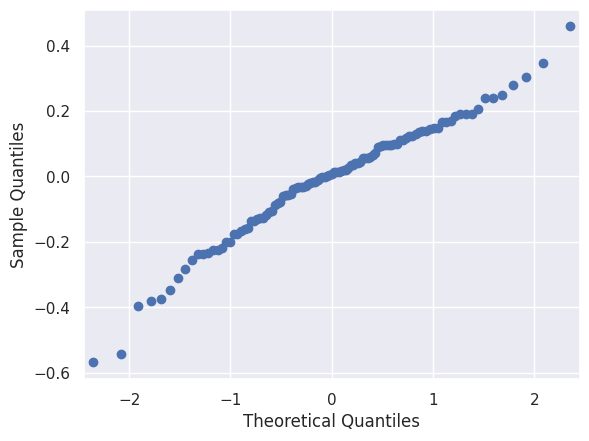

In [ ]:
## A distribuição deve ser uma N(0,1)
print(sm.stats.stattools.jarque_bera(resids))
sm.qqplot(resids)
plt.plot()

<Axes: xlabel='date'>

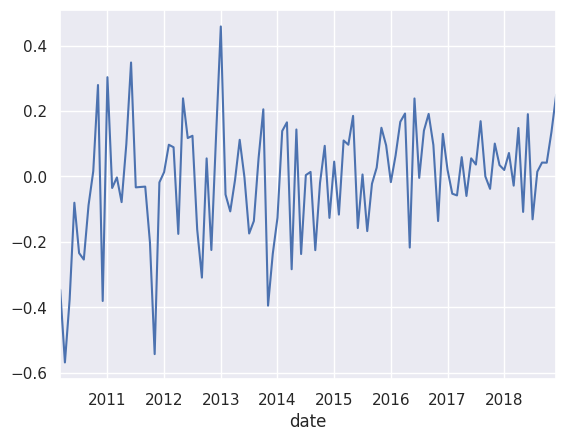

In [ ]:
resids[1:].plot()

(15.437603409883883, 0.11690338095194525, 1.6277524309663296, 0.1122042592608806)



(0.2342691115446959, 0.1075980811428882)

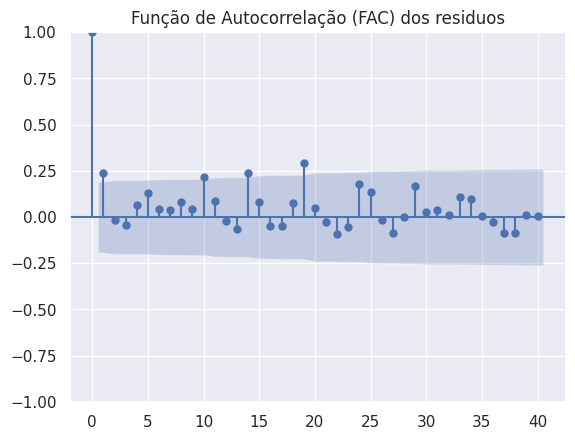

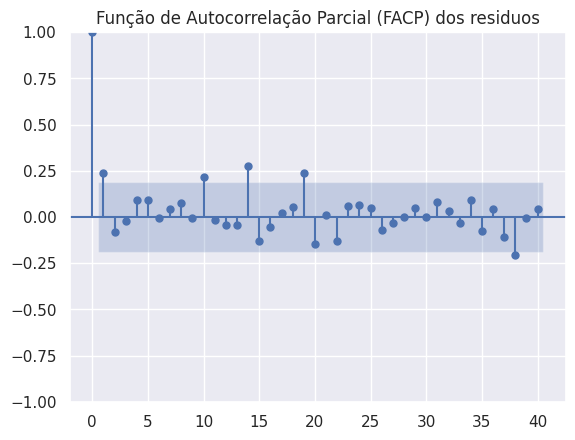

In [ ]:
## O residuo deve possuir homocedasticidade

#LM ARCH
print(sm.stats.diagnostic.acorr_lm(resids**2))
sm.graphics.tsa.plot_acf(resids**2,lags = 40)
plt.title("Função de Autocorrelação (FAC) dos residuos")
sm.graphics.tsa.plot_pacf(resids**2,lags = 40)
plt.title("Função de Autocorrelação Parcial (FACP) dos residuos")
print("")

#Teste H
# Considerando os 36 primeiros e 36 ultimos pontos, aproximadamente 1/3 do total de 107 medidas

std_inicial = np.std(resids[:36])
std_final = np.std(resids[-36-1:])
std_inicial,std_final

### Modelo com Log da serie

<Axes: xlabel='date'>

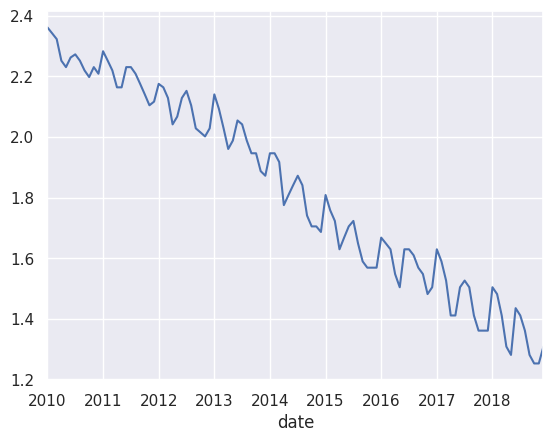

In [ ]:
log_unrate = np.log(df.unrate)
log_unrate.plot()

In [ ]:
arima_log = pm.auto_arima(log_unrate, max_order=None, m=12)

In [ ]:
arima_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  108
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 12)   Log Likelihood                 210.903
Date:                              Sat, 18 Nov 2023   AIC                           -409.806
Time:                                      18:08:28   BIC                           -394.420
Sample:                                  01-01-2010   HQIC                          -403.587
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0090      0.007     -1.258      0.209      -0.023       0.005
ar.L1          0.9193      0.062     14.760      0.000       0.797       1.041
ma.L1         -0.3276      0.138     -2.376      0.018      -0.598      -0.057
ma.L2         -0.1331      0.121     -1.097      0.273      -0.371       0.105
ma.S.L12      -0.6441      0.139     -4.636      0.000      -0.916      -0.372
sigma2         0.0007      0.000      6.004      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 0.29
Prob(Q):                              0.78   Prob(JB):                         0.87
Heteroskedasticity (H):               1.70   Skew:                            -0.09
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Comentário: Observamos que ao utilizar o logaritimo da série, o algoritimo decide em utilizar d=0 e D=1, indicando que a diferença sazonal foi capaz de transformar a série em estacionária e portanto dispensando a necessidade de que d=1. Isso é preferivel uma vez que diferenciações em excesso tendem a prejudicar a performance dos modelos exarcebando erros durante o processo de reversão da diferenciação.

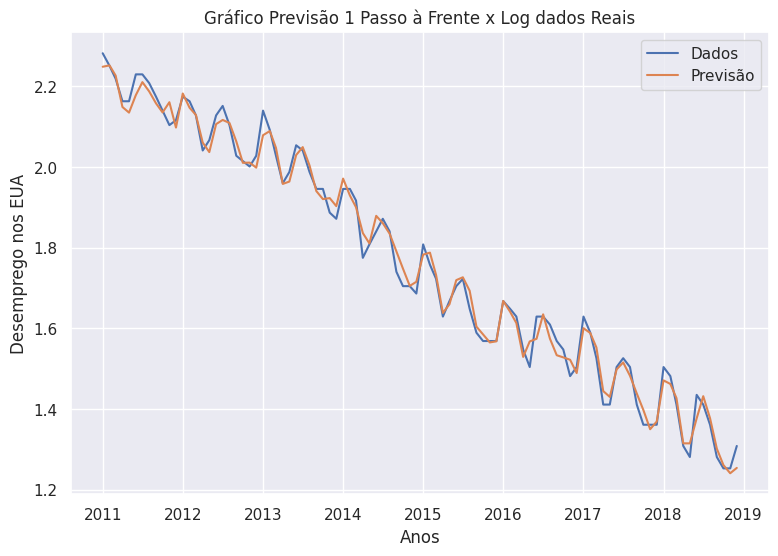

In [ ]:
_serie_log = log_unrate[12:]
_prev_log = arima_log.fittedvalues()[12:]

plt.figure(figsize=(9,6))
plt.plot(df.index[12:],_serie_log, label = "Dados")
plt.plot(df.index[12:],_prev_log, label = "Previsão")


plt.legend()
plt.title("Gráfico Previsão 1 Passo à Frente x Log dados Reais")
plt.xlabel("Anos")
plt.ylabel("Desemprego nos EUA")
plt.show()

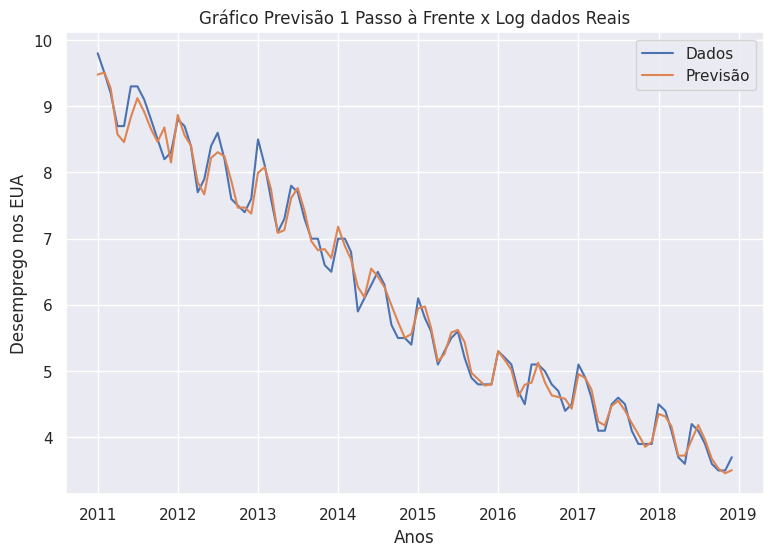

In [ ]:
serie_log = np.exp(_serie_log)
prev_log = np.exp(_prev_log)

plt.figure(figsize=(9,6))
plt.plot(df.index[12:],serie_log, label = "Dados")
plt.plot(df.index[12:],prev_log, label = "Previsão")


plt.legend()
plt.title("Gráfico Previsão 1 Passo à Frente x Log dados Reais")
plt.xlabel("Anos")
plt.ylabel("Desemprego nos EUA")
plt.show()

### Analise dos residuos do modelo com log

,lb_stat,lb_pvalue
1,1.277230,0.258415
2,1.282530,0.526626
3,2.373817,0.498527
4,2.703414,0.608617
5,10.189742,0.070034
6,11.733589,0.068183
7,12.367145,0.089113
8,12.372965,0.135323
9,12.440767,0.189586
10,13.997869,0.173089


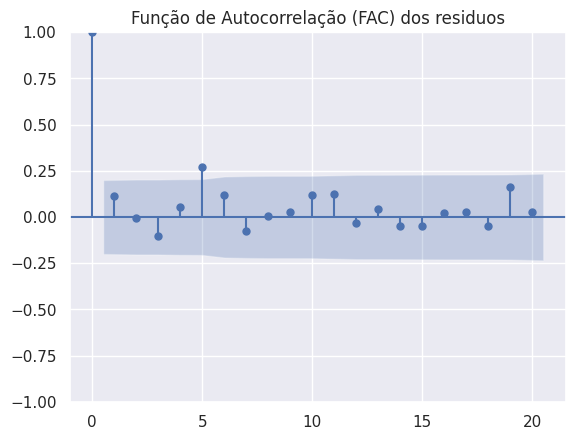

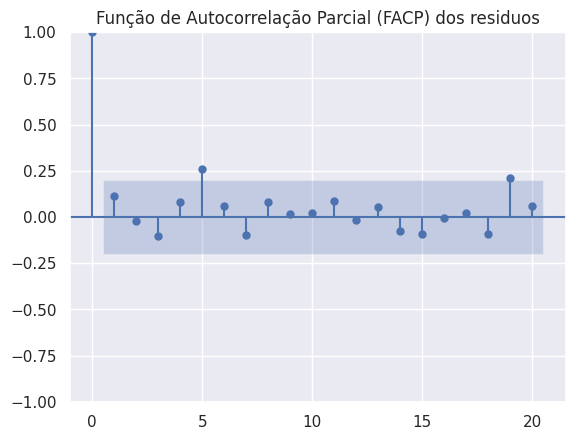

In [ ]:
#resids_log = arima_log.resid()[12:]
resids_log = serie_log - prev_log

## Autocorrelação deve ser nula
sm.graphics.tsa.plot_acf(resids_log)
plt.title("Função de Autocorrelação (FAC) dos residuos")
sm.graphics.tsa.plot_pacf(resids_log)
plt.title("Função de Autocorrelação Parcial (FACP) dos residuos")
print("")

sm.stats.diagnostic.acorr_ljungbox(resids_log)

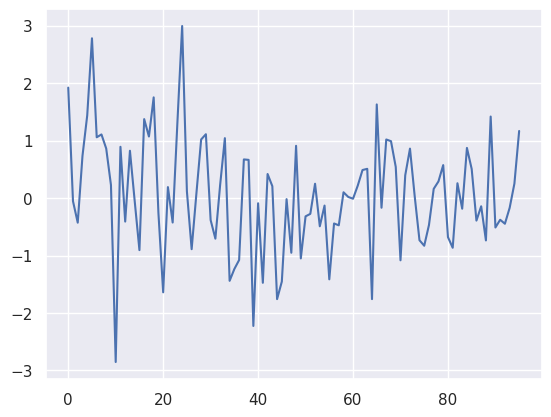

In [ ]:
plt.plot(np.arange(len(resids_log)),resids_log/np.std(resids_log))


(1.4225994135405735, 0.49100561924106345, 0.056454091838182285, 3.5855780011612866)


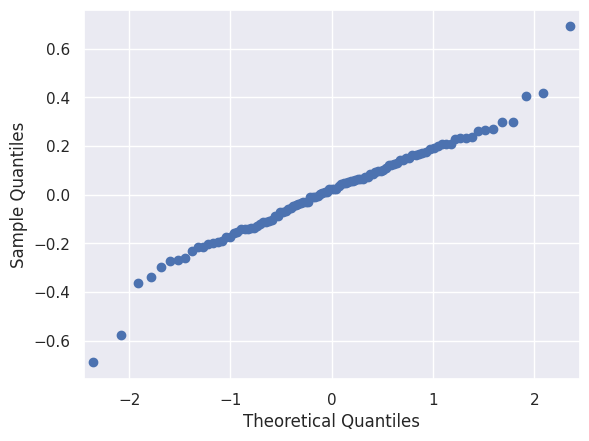

In [ ]:
## Distribuição dos residuos deve ser N(0,1)
print(sm.stats.stattools.jarque_bera(resids_log))
sm.qqplot(resids)
plt.show()


0.41189932591465866 1.8044816079040122


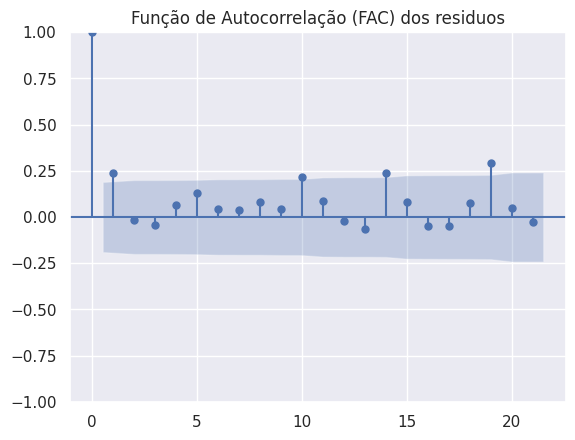

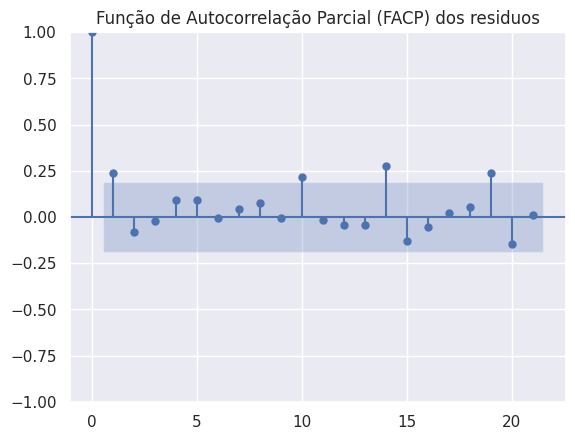

In [ ]:
##Homocedasticidade

#LM ARCH
#print(sm.stats.diagnostic.acorr_lm(resids_log**2))
sm.graphics.tsa.plot_acf(resids**2)
plt.title("Função de Autocorrelação (FAC) dos residuos")
sm.graphics.tsa.plot_pacf(resids**2)
plt.title("Função de Autocorrelação Parcial (FACP) dos residuos")
print("")

#Teste H
# Considerando os 32 primeiros e 32 ultimos pontos, 1/3 do total de 96 medidas
std_inicial = np.std(resids_log[:32])
std_final = np.std(resids_log[-32-1:])

H = std_final**2/std_inicial**2
crit = scipy.stats.f.ppf(q=1-0.05, dfn=32, dfd=32)
print(H,crit)

## 2.C

**INSERIR FORMULAS**

## 2.D

### Previsão utilizando ARIMA com log

In [ ]:
simulated, conf_int = arima_log.predict(12, return_conf_int=True)
simulated = np.exp(simulated)
conf_int = np.exp(conf_int)

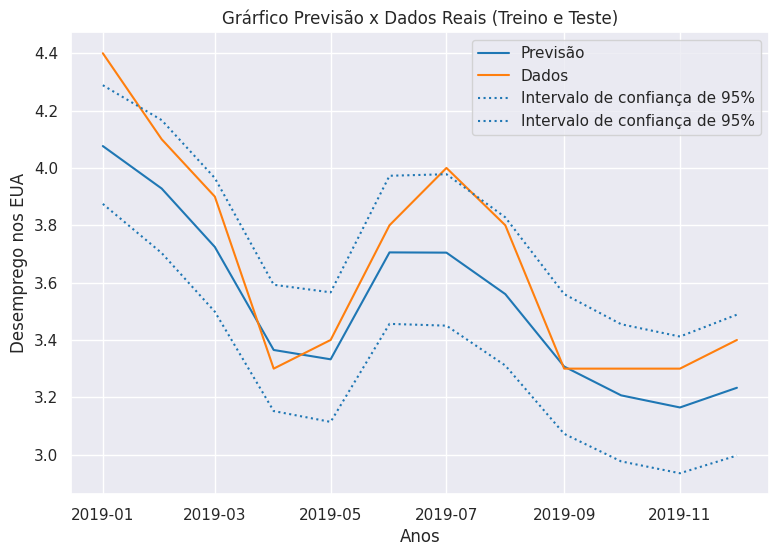

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(simulated, color="tab:blue",label="Previsão")
plt.plot(df_teste.unrate, color="tab:orange", label="Dados")
plt.plot(df_teste.index,conf_int, linestyle=":",color="tab:blue", label="Intervalo de confiança de 95%")

plt.legend()
plt.title("Grárfico Previsão x Dados Reais (Treino e Teste)")
plt.xlabel("Anos")
plt.ylabel("Desemprego nos EUA")
plt.show()

## 2.Extra

Inicialmente, os dados disponiveis referentes aos anos de 2020 e 2021 foram descartados devido ao impacto causado pela pandemia ter gerado um pico de desemprego que não poderia possivelmente se previsto pelo modelo, e ao tentar ajustar o modelo a um conjunto de dados com comportamentos tão dissonantes da tendencia previa resultaria em um modelo com um ajuste ruim em todo o periodo, tornando o assim inutilizavel.

Com o uso de variaveis dummies, entretanto, temos uma ferramenta que pode ser capaz de fornecer ao modelo meios de lidar com os dados que que previamente seriam intragaveis. Com o intuito de observar a viabilidade

### Serie aumentada e teste preliminar

In [ ]:
log_unrate2 = np.log(df_original[-143:-12].unrate)

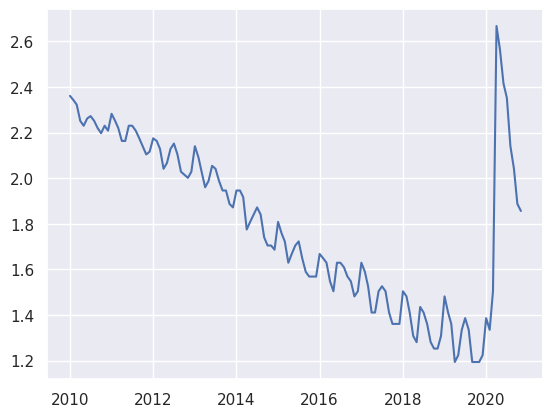

In [ ]:
plt.plot(log_unrate2)

In [ ]:
arima_log_pandemia = pm.auto_arima(log_unrate2, max_order=None, m=12)

In [ ]:
arima_log_pandemia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  131
Model:               SARIMAX(1, 1, 2)   Log Likelihood                  91.794
Date:                Sat, 18 Nov 2023   AIC                           -175.587
Time:                        18:12:04   BIC                           -164.117
Sample:                    01-01-2010   HQIC                          -170.926
                         - 11-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6504      0.290      2.245      0.025       0.083       1.218
ma.L1         -0.5461      0.297     -1.836      0.066      -1.129       0.037
ma.L2         -0.2594      0.095     -2.740      0.006      -0.445      -0.074
sigma2         0.0142      0.001     28.399      0.000       0.013       0.015
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             23244.51
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              21.33   Skew:                             6.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        67.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

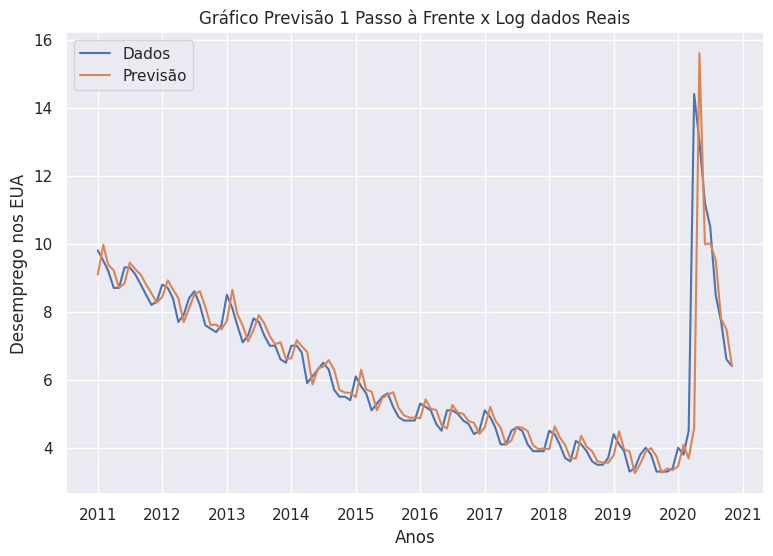

In [ ]:
serie_log_pandemia = np.exp(log_unrate2[12:])
prev_log_pandemia = np.exp(arima_log_pandemia.fittedvalues()[12:])

plt.figure(figsize=(9,6))
plt.plot(log_unrate2[12:].index,serie_log_pandemia, label = "Dados")
plt.plot(log_unrate2[12:].index,prev_log_pandemia, label = "Previsão")


plt.legend()
plt.title("Gráfico Previsão 1 Passo à Frente x Dados Reais")
plt.xlabel("Anos")
plt.ylabel("Desemprego nos EUA")
plt.show()

Verificamos pelo grafico que o auto arima retorna um modelo em que suas previsões se aproximam do caso degenerado: \begin{equation} \hat{y}_t = y_{t-1} \end{equation}


### Testando log + intervenção incluindo o periodo pandemico



Escolhemos variaveis de intervenção associadas aos dados de 2020/fev, 2020/mar, 2020/abr e 2020/mai.
Realizamos essa escolha por serem os 4 primeiros meses em que é possivel identificar
mudanças que podem ser atribuidas aos choques economicos da pandemia de COVID-19.

Continuamos utilizando o log da serie, uma vez que essa medida se mostrou adequada nos itens anteriores.

In [ ]:
intervention_dummies = np.zeros(shape = (len(log_unrate2),4))
intervention_dummies[122,0] = 1
intervention_dummies[123,1] = 1
intervention_dummies[124,2] = 1
intervention_dummies[125,3] = 0

In [ ]:
arima_log_int_pandemia = pm.auto_arima(log_unrate2, X = intervention_dummies, max_order=None, m=12)

In [ ]:
arima_log_int_pandemia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  131
Model:             SARIMAX(2, 0, 2)x(1, 0, [], 12)   Log Likelihood                 184.289
Date:                             Sat, 18 Nov 2023   AIC                           -346.577
Time:                                     18:22:52   BIC                           -314.950
Sample:                                 01-01-2010   HQIC                          -333.726
                                      - 11-01-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0824      0.037      2.210      0.027       0.009       0.155
x1            -0.0421      0.021     -1.983      0.047      -0.084      -0.000
x2             0.8594      0.027     31.938      0.000       0.807       0.912
x3             0.3896      0.032     12.130      0.000       0.327       0.453
const               0   8.98e-08          0      1.000   -1.76e-07    1.76e-07
ar.L1          0.7333      0.267      2.749      0.006       0.211       1.256
ar.L2          0.1441      0.250      0.575      0.565      -0.347       0.635
ma.L1          0.6148      0.259      2.374      0.018       0.107       1.122
ma.L2          0.4760      0.141      3.386      0.001       0.200       0.752
ar.S.L12       0.6506      0.093      6.969      0.000       0.468       0.834
sigma2         0.0032      0.000      8.929      0.000       0.002       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.70   Jarque-Bera (JB):               246.31
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               6.89   Skew:                             1.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.12e+18. Standard errors may be unstable.
"""

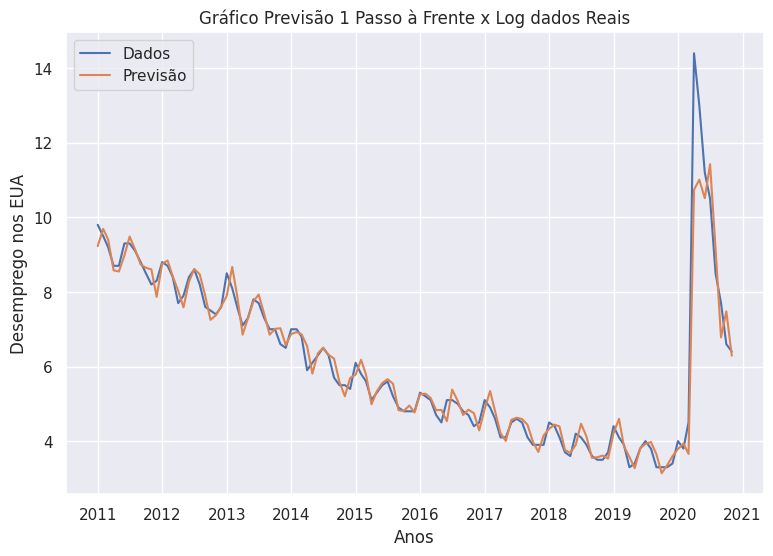

In [ ]:
serie_log_int_pandemia = np.exp(log_unrate2[12:])
prev_log_int_pandemia = np.exp(arima_log_int_pandemia.fittedvalues()[12:])

plt.figure(figsize=(9,6))
plt.plot(log_unrate2[12:].index,serie_log_int_pandemia, label = "Dados")
plt.plot(log_unrate2[12:].index,prev_log_int_pandemia, label = "Previsão")


plt.legend()
plt.title("Gráfico Previsão 1 Passo à Frente x Log dados Reais")
plt.xlabel("Anos")
plt.ylabel("Desemprego nos EUA")
plt.show()

In [ ]:
simulated, conf_int = arima_log_int_pandemia.predict(12,X = np.zeros((12,4)), return_conf_int=True)
simulated = np.exp(simulated)
conf_int = np.exp(conf_int)

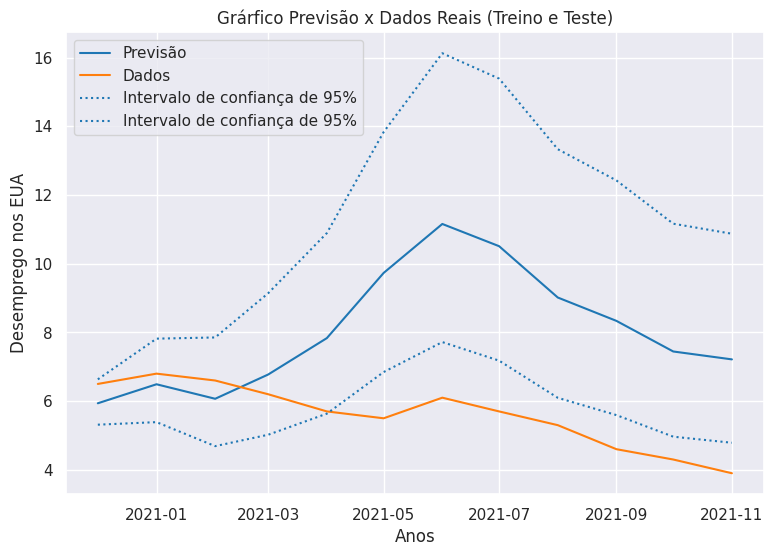

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(df_original[-12:].index,simulated, color="tab:blue",label="Previsão")
plt.plot(df_original[-12:].unrate, color="tab:orange", label="Dados")
plt.plot(df_original[-12:].index,conf_int, linestyle=":",color="tab:blue", label="Intervalo de confiança de 95%")

plt.legend()
plt.title("Grárfico Previsão x Dados Reais (Treino e Teste)")
plt.xlabel("Anos")
plt.ylabel("Desemprego nos EUA")
plt.show()

O modelo não é capaz de prever adequadamente o comportamento da série. Apesar da previsão se manter razoavelmente próximo do valor real nos primeiros meses, ainda abarcados pelo intervalo de confiança do modelo, ele preve um pico exageradamente grande de desemprego que afasta, e também mantem as medidas seguintes afastadas, do valor real.

Essa sazonalidade mais acentuada é compativel com o periodo pré pandemico, mas é necessário ressaltar aqui que no periodo pós pandemico existe uma pequena mudança no comportamento da serie, com uma queda mais suave e constante. Vale destacar também que temos apenas 2 anos de dados disponiveis do periodo pos pandemia (2020 e 2021, a fonte utilizada não incluia dados de 2022 ou 2023), um periodo muito curto para que o modelo pudesse realizar um ajuste mais adequado a este novo periodo.

Incluimos esses testes aqui por termos considerados os resultados interessantes, mas reconhecemos que os resultados talvez não sejam adequados. Em especial, se consideramos que no periodo pós pandemia temos de fato uma completa mudança no comportamento da serie temporal, e não apenas uma perturbação momentanea, tentar utilizar apenas um modelo para os dois periodos pode ser inadequado.

---

# Tarefa 2 - Questão 3

## 3.A

Não incluiremos aqui os dummies da 2B já que os mesmos apresentaram P_valor muito alto, indicando irrelevância para a série temporal.

### Modelo de dummies sazonais

In [ ]:
# import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#Pegando da série de primeira diferença
dummies = np.tile(np.eye(12),(9,1))

dummies = dummies[1:,1:]

In [ ]:
dummies.shape

(107, 11)

In [ ]:
arima_dummy = ARIMA(diff_1a.unrate, exog = dummies)
arima_dummy = arima_dummy.fit()
arima_dummy.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 unrate   No. Observations:                  107
Model:                          ARIMA   Log Likelihood                  60.687
Date:                Sat, 18 Nov 2023   AIC                            -95.374
Time:                        19:31:14   BIC                            -60.627
Sample:                    02-01-2010   HQIC                           -81.288
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6250      0.052     11.983      0.000       0.523       0.727
x1            -0.8139      0.074    -10.957      0.000      -0.959      -0.668
x2            -0.8917      0.080    -11.128      0.000      -1.049      -0.735
x3            -1.1917      0.069    -17.382      0.000      -1.326      -1.057
x4            -0.5917      0.065     -9.054      0.000      -0.720      -0.464
x5            -0.1917      0.067     -2.872      0.004      -0.322      -0.061
x6            -0.5694      0.079     -7.223      0.000      -0.724      -0.415
x7            -0.8694      0.075    -11.519      0.000      -1.017      -0.722
x8            -0.9917      0.072    -13.711      0.000      -1.133      -0.850
x9            -0.7694      0.092     -8.373      0.000      -0.950      -0.589
x10           -0.7139      0.060    -11.842      0.000      -0.832      -0.596
x11           -0.6028      0.071     -8.502      0.000      -0.742      -0.464
sigma2         0.0188      0.003      6.027      0.000       0.013       0.025
===================================================================================
Ljung-Box (L1) (Q):                   4.59   Jarque-Bera (JB):                 1.54
Prob(Q):                              0.03   Prob(JB):                         0.46
Heteroskedasticity (H):               0.64   Skew:                            -0.24
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

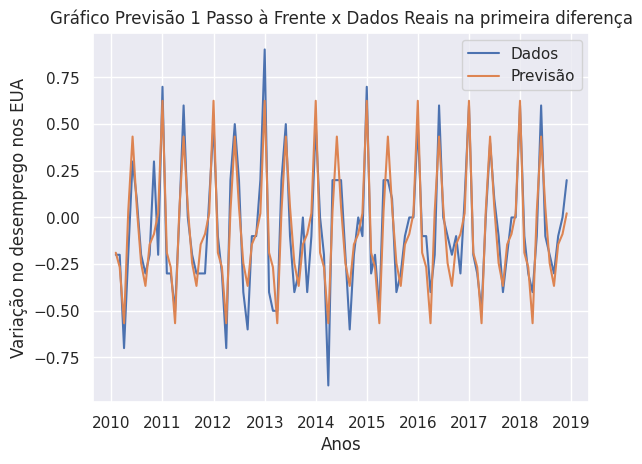

In [ ]:
#plt.figure(figsize=(9,6))
plt.plot(diff_1a.unrate, label = "Dados")
plt.plot(arima_dummy.fittedvalues, label = "Previsão")

plt.title("Gráfico Previsão 1 Passo à Frente x Dados Reais na primeira diferença")
plt.xlabel("Anos")
plt.ylabel("Variação no desemprego nos EUA")
plt.legend()
plt.show()

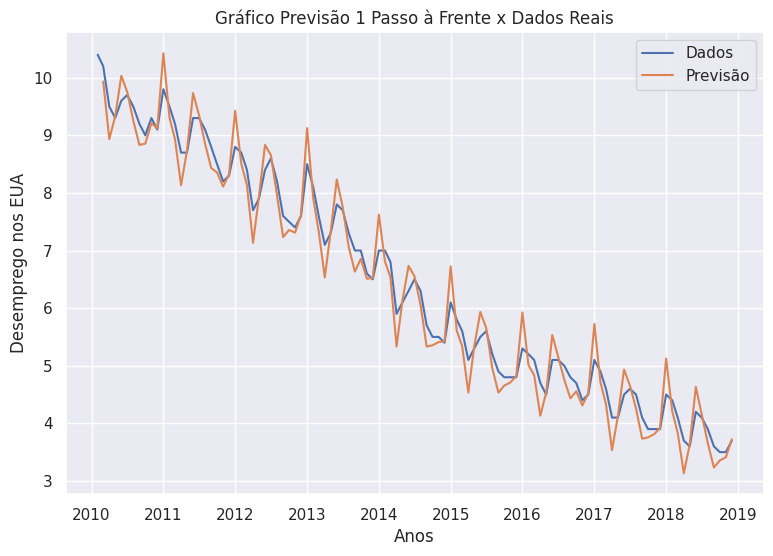

In [ ]:
serie = df.unrate[1:]
prev_dummy1 = arima_dummy.fittedvalues[1:] + serie
plt.figure(figsize=(9,6))
plt.plot(df.index[1:],serie, label = "Dados")
plt.plot(df.index[1:],prev_dummy1, label = "Previsão")


plt.legend()
plt.title("Gráfico Previsão 1 Passo à Frente x Dados Reais")
plt.xlabel("Anos")
plt.ylabel("Desemprego nos EUA")
plt.show()

### ARMA + Dummies sazonais

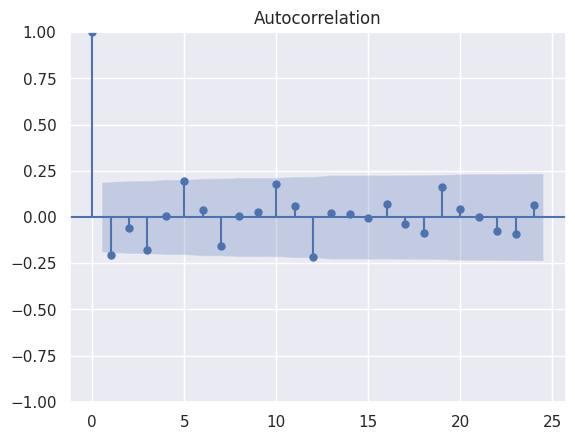

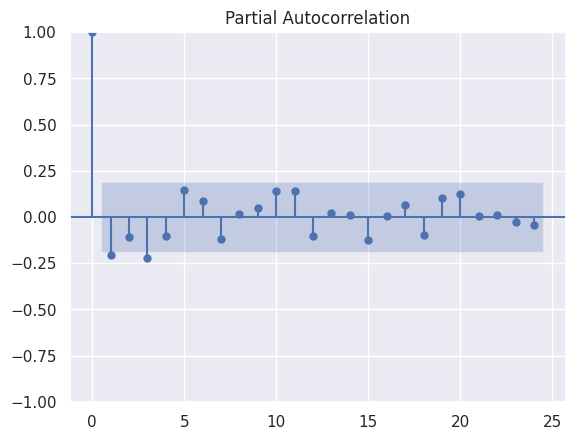

In [ ]:
plot_acf(arima_dummy.resid, lags=24)
plt.show()

plot_pacf(arima_dummy.resid, lags=24)
plt.show()

In [ ]:
arima_dummy_resids = pm.auto_arima(arima_dummy.resid, stationary=True, seasonal=False, max_order=None, m=12)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


In [ ]:
arima_dummy_resids.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(1, 0, 1)   Log Likelihood                  65.069
Date:                Sat, 18 Nov 2023   AIC                           -124.137
Time:                        19:32:54   BIC                           -116.119
Sample:                    02-01-2010   HQIC                          -120.886
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3436      0.244      1.408      0.159      -0.135       0.822
ma.L1         -0.6232      0.213     -2.919      0.004      -1.042      -0.205
sigma2         0.0173      0.002      7.006      0.000       0.012       0.022
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.14
Prob(Q):                              0.91   Prob(JB):                         0.93
Heteroskedasticity (H):               0.62   Skew:                            -0.07
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Como pode ser observado no Summary, o modelo encontrado fora SARIMAX(1, 0, 1). Logo temos que a dependência a curto prazo pode ser dado como um modelo ARMA(1,1) tal que:
p=1
q=1

## 3.B

In [ ]:
arima_dummy = ARIMA(diff_1a.unrate, exog = dummies, order=(1,0,1))
arima_dummy = arima_dummy.fit()
clear_output()

arima_dummy.summary()

As modificações que seriam necessárias para ajustar o modelo, seriam para melhorar as avaliações no curto prazo que mesmo dentro dos parâmetros aceitáveis, pode ser melhorado.

In [ ]:
plt.plot(diff_1a.unrate, label = "Dados")
plt.plot(arima_dummy.fittedvalues, label = "Previsão")

plt.legend()
plt.title("Gráfico Previsão 1 Passo à Frente x Dados Reais na primeira diferença")
plt.xlabel("Anos")
plt.ylabel("Variação no desemprego nos EUA")
plt.show()

In [ ]:
serie = df.unrate[1:]
prev_dummy2 = arima_dummy.fittedvalues + serie
plt.figure(figsize=(9,6))
plt.plot(df.index[1:],serie, label = "Dados")
plt.plot(df.index[1:],prev_dummy2, label = "Previsão")

plt.legend()
plt.title("Gráfico Previsão 1 Passo à Frente x Dados Reais")
plt.xlabel("Anos")
plt.ylabel("Desemprego nos EUA")
plt.show()

## 3.C

\begin{equation}
Z_t = a_0 + ∑^{11}_{j=0} a_j \cdot D_{j \cdot t} + ϵ_t
\end{equation}

Onde o somatório é dado pela matriz Dummy e a é dado pela média do primeiro mês da série, sendo esse, Janeiro. E o Erro é dado pelo ARMA(1,1) encontrado utilizando o auto-arima.

A partir do sumário dado na questão 3.A, temos que a constante encontrada possui o valor 0.6250.

<!-- Substituir o gamma -->

\begin{equation}
Z_t = a_0 + ∑^{11}_{j=0} a_j \cdot D_{j \cdot t} + ARMA(1,1)
\end{equation}

## 3.D

In [ ]:
# Modelo Dummy + ARMA

rmse = root_mean_square_error(serie, prev_dummy2)
mae = mean_absolute_percentage_error(serie, prev_dummy2)
mape = mean_absolute_error(serie, prev_dummy2)

# Criar uma tabela de estatísticas de aderência
tabela_modelos = pd.DataFrame({
    'Modelo': 'dummy_arima',
    'RMSE': [rmse],
    'MAE': [mae],
    'MAPE': [mape],
})

In [ ]:
#Modelo Auto SARIMA

rmse = root_mean_square_error(serie, prev1)
mae = mean_absolute_percentage_error(serie, prev1)
mape = mean_absolute_error(serie, prev1)

new_row = pd.DataFrame({
    'Modelo': 'auto_arima',
    'RMSE': [rmse],
    'MAE': [mae],
    'MAPE': [mape],
})

tabela_modelos = pd.concat([tabela_modelos, new_row], ignore_index=True)

In [ ]:
tabela_modelos

**Modelo ETS**

O modelo mais próximo encontrado na lista 1 havia sido o ETS(AAA). Ressalvas devem ser feitas em dois pontos: os resultados da lista 1 indicavam que um modelo multiplicativo adequado melhor que o ETS(AAA) deveria ser possivel, apesar de não ter sido encontrado. Além disso, o periodo de treinamento utilizado durante a lista 1 foi diferente do periodo utilizado aqui, tendo sido realizada a mudança pois o periodo da lista 1 foi considerado grande demais. Mantemos o modelo ETS(AAA) por questão de consistência e assim de sermos breves.

In [ ]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [ ]:
# Modelo ETS

## O modelo mais próximo encontrado na lista 1 havia sido o ETS(AAA). Mesmo com a ressalva de que possivelmente existe um modelo melhor com erro multiplicativo. Prefirimos manter pra ser condizente com a resposta da lista 1

modelo_AAA = ETSModel(df.unrate,
    error="add",
    trend="add",
    seasonal="add",
    damped_trend=None,
    seasonal_periods = 12).fit()
modelo_AAA.summary()

In [ ]:
prev_AAA = modelo_AAA.fittedvalues

plt.figure(figsize=(9,6))
plt.plot(df.index,df.unrate, label = "Dados")
plt.plot(df.index,prev_AAA, label = "Previsão")

plt.legend()
plt.title("Gráfico Previsão 1 Passo à Frente x Dados Reais")
plt.xlabel("Anos")
plt.ylabel("Desemprego nos EUA")
plt.show()

In [ ]:
rmse = root_mean_square_error(df.unrate, prev_AAA)
mae = mean_absolute_percentage_error(df.unrate, prev_AAA)
mape = mean_absolute_error(df.unrate, prev_AAA)

new_row = pd.DataFrame({
    'Modelo': 'modelo_ets',
    'RMSE': [rmse],
    'MAE': [mae],
    'MAPE': [mape],
})

tabela_modelos = pd.concat([tabela_modelos, new_row], ignore_index=True)

In [ ]:
tabela_modelos

In [ ]:
# Modelo Média Aritmética das Previsões dos modelos anteriores


## Calcular a Média das previsões

previsoes_matriz = np.column_stack((prev_dummy2, prev1, prev_AAA[1:]))
media_aritmetica = np.mean(previsoes_matriz, axis=1)

## Calcular os métricas de aderência
rmse = root_mean_square_error(serie, media_aritmetica)
mae = mean_absolute_percentage_error(serie, media_aritmetica)
mape = mean_absolute_error(serie, media_aritmetica)

new_row = pd.DataFrame({
    'Modelo': 'media_aritm',
    'RMSE': [rmse],
    'MAE': [mae],
    'MAPE': [mape],
})

tabela_modelos = pd.concat([tabela_modelos, new_row], ignore_index=True)

In [ ]:
tabela_modelos

O modelo auto-arima possui um código bem mais robusto para definir os parâmetros iniciais e encontrar o melhor modelo que defina nossa série temporal.
Porém, vale ressaltar que foi possível perceber como o modelo Dummy + Arima também obteve boas métricas de aderência.

Contudo, é possível observar pela tabela que o modelo com as melhores métricas foi o Modelo ETS(AAA). Isso pode ser devido a natureza do nosso modelo ser relativamente simples e mais fácil de ser capturado pelo modelo ETS já que o mesmo não precisa de muitos parâmetros. Ou pela componente de erro encontrada na série ser mais complexa que o ARIMA havia encontrado.

Também vale ressaltar que o modelo ETS é um caso particular de SARIMA. Tal que, no nosso caso, o modelo ETS(AAA) seria um SARIMA(0,1,13)x(0,1,0,12); o auto-sarima pode não ter sido o melhor modelo nesse caso por ter encontrado um SARIMAX(0, 1, 1)x(2, 0, 1, 12) como visto anteriormente.


- Falar como há diferença entre ter aderências melhores não indica que as previsões serão melhores
- Falar como comparar critérios de informação também só são válidos para modelos ARIMA de mesma ordem de diferenciação
- Falar sobre modelos ETS com sazonalidade precisam de 2 níveis de diferenciação e por isso seus critérios não necessariamente podem ser comparados com os ARIMA de primeira ordem

Tudo isso está [nesse link aqui](https://otexts.com/fpp2/arima-ets.html#arima-ets)

## 3.E

In [ ]:
### Reestimar o modelo com a amostra inteira

#model = sm.tsa.ARIMA(diff_1a.unrate, order=(0, 0, 1), seasonal_order=(2,0,1,12))
#fit = model.fit()

pred = modelo_AAA.get_prediction(start = "2010-02-01", end= "2018-12-01")
pred_summary = pred.summary_frame(alpha=0.1)

def sum_to_df(series, df):
        return df + series

#pred_summary = pred_summary.apply(lambda x: sum_to_df(df.unrate[1:], x), axis=0)

simulated_with_error = modelo_AAA.simulate(anchor="end", nsimulations=12, repetitions=100)
simulated_with_error = simulated_with_error
#simulated_with_error = simulated_with_error.cumsum()
#simulated_with_error = simulated_with_error + df.unrate.iloc[-1]
clear_output()
## Obter a previsão com intervalo de confiança de 95%

In [ ]:
pred_summary

In [ ]:
upper_ci = simulated_with_error.quantile(q=0.90, axis='columns')
lower_ci = simulated_with_error.quantile(q=0.1, axis='columns')

mean = simulated_with_error.quantile(q=0.5, axis='columns')
#mean = np.mean(simulated_with_error,axis = 1)


#pred_summary = pred_summary.apply(lambda x: sum_to_df(df.unrate, x), axis=0)
#pred_summary.dropna(inplace=True)

plt.figure(figsize=(16,10))
plt.plot(mean, color="tab:blue",label="Previsão")
plt.plot(df_teste.unrate, color="tab:orange", label="Dados")
upper_ci.plot(linestyle=":", color="tab:blue", label="Intervalo de confiança de 90%")
lower_ci.plot(linestyle=":", color="tab:blue", label="_")

plt.axvline(x="2019-01-01",color="red", label = "Separação Treino/Teste")

pred_summary["mean"].plot(label="_")
plt.plot(serie,label = "_", color="tab:orange")
pred_summary["pi_lower"].plot(linestyle=":", color="tab:blue", label="_")
pred_summary["pi_upper"].plot(linestyle=":", color="tab:blue", label="_")

plt.legend()
plt.title("Grárfico Previsão x Dados Reais (Treino e Teste)")
plt.xlabel("Anos")
plt.ylabel("Desemprego nos EUA")
plt.show()

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(mean, color="tab:blue",label="Previsão")
plt.plot(df_teste.unrate, color="tab:orange", label="Dados")
upper_ci.plot(linestyle=":", color="tab:blue", label="Intervalo de confiança de 90%")
lower_ci.plot(linestyle=":", color="tab:blue", label="_")

plt.legend()
plt.title("Grárfico Previsão x Dados Reais (Teste)")
plt.xlabel("Anos")
plt.ylabel("Desemprego nos EUA")
plt.show()

---

# Código para impressão

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [ ]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/lista3.ipynb"